In [ ]:
#패키지 설정                               
from sklearn.preprocessing import StandardScaler         #정규화 모듈 설정
from sklearn.model_selection import train_test_split       #학습용과 테스트용 분리
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential        #딥러닝 모형화
from keras.layers import Dense           #층간 노드 모두 연결
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/대학원/1학기/1. 고급통계분석(김영순)/z. 기말고사 과제/주가 자료 원본/삼성전자 주가 관련 자료(엑셀)-3.xlsx')

print(df.head(8))

          일자     시가     고가     저가     종가  전일비  7 거래일 이내 최고 상승률    등락  주가등락률  \
0 2022-12-05  60900  61100  60000  60300    0                0  -100  -0.17   
1 2022-12-02  62500  62500  60400  60400    0                0 -2200  -3.51   
2 2022-12-01  63100  63200  62300  62600    1                0   400   0.64   
3 2022-11-30  60400  62200  60200  62200    1                0  1600   2.64   
4 2022-11-29  59900  60600  59800  60600    1                0   500   0.83   
5 2022-11-28  60500  60500  59800  60100    0                0  -900  -1.48   
6 2022-11-25  61400  61700  60800  61000    0                0  -400  -0.65   
7 2022-11-24  61200  61700  60900  61400    1                1   400   0.66   

        거래량  ...  사모펀드(KOSPI)  기타법인(KOSPI)    기준환율  환율 증감  Open(NASDAQ)  \
0  13767787  ...         -913           59  1292.6   -7.3   11380.99023   
1  15331184  ...         -776           31  1299.9    0.2   11308.37988   
2  16631445  ...          -37          191  1299.7  -19.1   114

In [ ]:
df['7 거래일 이내 최고 상승률'].value_counts()

1    789
2    146
3     25
0      7
4      2
Name: 7 거래일 이내 최고 상승률, dtype: int64

In [ ]:
df.set_index('일자',inplace=True)
df = df.astype('float')   #inplace 가 없음

In [ ]:
y=df[['7 거래일 이내 최고 상승률']]   #목표변수의 데이터 프레임
y = y.astype(int)
print(y)

            7 거래일 이내 최고 상승률
일자                         
2022-12-05                0
2022-12-02                0
2022-12-01                0
2022-11-30                0
2022-11-29                0
...                     ...
2019-01-09                2
2019-01-08                3
2019-01-07                2
2019-01-04                2
2019-01-03                2

[969 rows x 1 columns]


In [ ]:
X = df.drop('7 거래일 이내 최고 상승률', axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)    #학습용과 데이터 분리(7:3)

In [ ]:
#정규화 스케일러 생성
scalerX = StandardScaler()
#정규화 스케일러를 학습용 데이터에 맞춤
scalerX.fit(X_train)
#정규화 스케일러로 학습용 데이터를 변환
X_train_std=scalerX.transform(X_train)
#정규화 스케일러로 테스트용 데이터를 변화
X_test_std=scalerX.transform(X_test)

In [ ]:
import numpy as np
y_train.reset_index(inplace=True)
y_train2 = np.array(y_train['7 거래일 이내 최고 상승률'])
y_test.reset_index(inplace=True)
y_test2 = np.array(y_test['7 거래일 이내 최고 상승률'])

y_train2 = pd.get_dummies(y_train2)
y_test2 = pd.get_dummies(y_test2)

In [ ]:
#모형 구조
import tensorflow as tf
model=Sequential()       #순차모형
model.add(Dense(30,activation='relu', input_shape=(43,)))      #제1은닉층과 입력층
#model.add(Dense(15,activation='relu'))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                1320      
                                                                 
 dense_4 (Dense)             (None, 5)                 155       
                                                                 
Total params: 1,475
Trainable params: 1,475
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모형구성
model.compile(optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy',tf.keras.metrics.Precision(name='precision')])

In [ ]:
#학습
results=model.fit(X_train_std, y_train2,                 #학습데이터
	        validation_data=(X_test_std, y_test2),	   #테스트데이터	
	        epochs=100,batch_size=32)

Epoch 1/100
22/22 [==============================] - 2s 32ms/step - loss: 1.7395 - accuracy: 0.2773 - precision: 0.3989 - val_loss: 1.3056 - val_accuracy: 0.4639 - val_precision: 0.6400
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 1.0817 - accuracy: 0.6357 - precision: 0.7354 - val_loss: 0.8693 - val_accuracy: 0.7491 - val_precision: 0.8159
Epoch 3/100
22/22 [==============================] - 0s 8ms/step - loss: 0.7770 - accuracy: 0.7950 - precision: 0.8305 - val_loss: 0.7229 - val_accuracy: 0.7869 - val_precision: 0.8077
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6714 - accuracy: 0.8112 - precision: 0.8254 - val_loss: 0.6760 - val_accuracy: 0.8041 - val_precision: 0.8066
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6271 - accuracy: 0.8142 - precision: 0.8215 - val_loss: 0.6510 - val_accuracy: 0.8041 - val_precision: 0.8100
Epoch 6/100
22/22 [==============================] - 0s 14ms/step - loss: 

In [ ]:
#학습모형에 저장된 키(변수)
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])


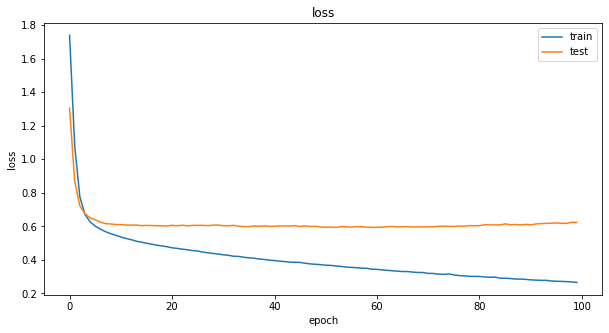

In [ ]:
#학습 수에 따른 loss변화
plt.figure(figsize=(10,5))
plt.plot(results.history['loss'])    #학습데이터의 손실
plt.plot(results.history['val_loss'])     #테스트데이터의 손실
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

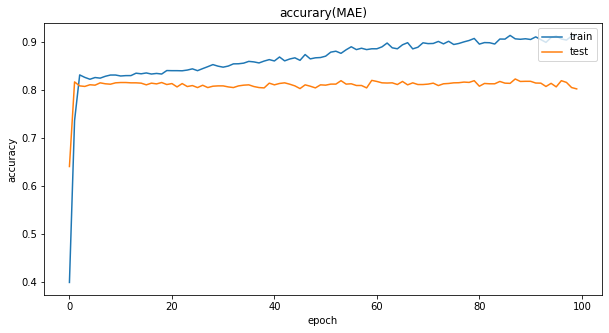

In [ ]:
#학습 수에 따른 정확도(mae)변화
plt.figure(figsize=(10,5))
plt.plot(results.history['precision'])      #학습데이터의 오차
plt.plot(results.history['val_precision'])   #테스트 데이터의 오차
plt.title('accurary(MAE)')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [ ]:
y_pred=np.argmax(model.predict(X_test_std), axis=1)
y_test = y_test['7 거래일 이내 최고 상승률']
import sklearn
sklearn.metrics.confusion_matrix(y_test, y_pred)

10/10 [==============================] - 0s 2ms/step


array([[  0,   3,   0,   0,   0],
       [  0, 220,  15,   0,   0],
       [  0,  32,  11,   1,   0],
       [  0,   3,   5,   0,   0],
       [  0,   0,   1,   0,   0]])

In [ ]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print('accuracy_score : ',acc)

pre = precision_score(y_test, y_pred, average='weighted')
print('precision_score : ', pre)

recall = recall_score(y_test, y_pred, average='weighted')
print('recall_score: ', recall)

accuracy_score :  0.7938144329896907
precision_score :  0.7405931164921814
recall_score:  0.7938144329896907


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
